## CDM

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import warnings 
from numpy import linalg as lin
warnings.filterwarnings('ignore')

In [73]:
dx=.01
L=10
n=int(L/dx)
x=np.linspace(0.1,L,2*n+1)

In [74]:
def kron(i,j):
    return 1 if i==j else 0
def h(i,j): #DERIVE
    return (2*kron(i,j)-kron(i+1,j)-kron(i-1,j))/dx**2+V(dx*i)*kron(i,j)
def V(x): #diff pots
    return (1-np.e**(-.1*(x-2)))**2
#     if x>0:
#         return x
#     elif x<0:
#         return -x
#     elif x==0:
#         return 0
    #return x**2 #-2/x #(x**2-1)**2 #x**4-x**2 #e**(x)/x

In [75]:
H=np.array([[h(i,j) for i in range(1,2*n+2)] for j in range(1,2*n+2)])
pot=np.array([V(dx*i) for i in range(1,2*n+2)])

In [76]:
eigval,eigvec=lin.eig(H)
index=eigval.argsort()
eigval=eigval[index]
eigvec=eigvec[:,index]

In [77]:
H

array([[ 20000.0484801 , -10000.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [-10000.        ,  20000.04794453, -10000.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        , -10000.        ,  20000.04741247, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
         20000.69644989, -10000.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
        -10000.        ,  20000.69672595, -10000.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        , -10000.        ,  20000.69700179]])

0.15762364742146234
0.3786441648914572
0.5613846329807274


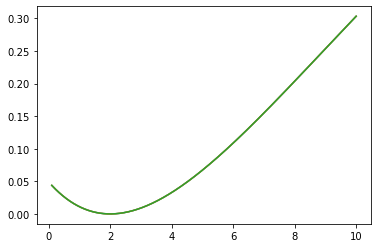

In [78]:
pot=[V(x) for x in x]
for i in range(0,3):
    psi0=10*eigvec[:,i] #+eigval[i]
    print(eigval[i])
    #plt.plot(x,psi0)
    plt.plot(x,pot)


## Time evolution 

In [10]:
V=5
E=5
h_bar=1.054*10**-34
m=9.1*10**-31
l0=2*10**-9
E0=((h_bar**2)/(2*m*l0**2))/(1.6*10**-19)
v=V/E0 
e=E/E0
p0=(E/E0)**.5
p0,E0,v

(22.896551239466202, 0.009537396978021974, 524.2520586615012)

In [33]:
p0=5
def pot(x):
    if -.5 <= x <= .5 : 
        return V0 
    else:
        return 0
def p(a,b,x):
    return ((1/np.pi*a**2)**.25)*(e**((-(x-b)**2)/(2*a**2)-1.0j*p0*x))
def c(i):
    return np.vdot(np.sqrt(dx)*Psi,eigvec[:,i])
def prob(t):
    return np.array([abs(psiT(t)[i])**2 for i in range (0,2*N+1)])
H=np.array([[h(i,j) for i in range(1,2*n+2)] for j in range(1,2*n+2)])
pot=np.array([V(dx*i) for i in range(1,2*n+2)])

eigval,eigvec=lin.eig(H)
index=eigval.argsort()
eigval=eigval[index]
eigvec=eigvec[:,index]

In [34]:
a=1
b=-7
p0=10
def p(a,b,x):
    return ((1/np.pi*a**2)**.25)*np.e**(-((x-b)**2)/(2*a**2)-1.0j*p0*x)
def c(i):
    return np.vdot(np.sqrt(dx)*Psi,eigvec[:,i])
def psit(t):
    sum=0
    for i in range(0,2*n+1):
        sum+=c(i)*np.e**(-1.0j*eigval[i]*t)*eigvec[:,i]
    return sum
def prob(t):
    return np.array([abs(psit(t)[i])**2 for i in range(0,2*n+1)])

In [35]:
Psi=p(1,-7,x)
prob(0)

array([2.07553749e-03, 2.03423566e-03, 1.99335700e-03, ...,
       1.61919130e-30, 6.10352019e-31, 1.26789970e-31])

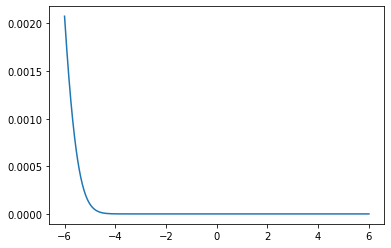

In [36]:
plt.plot(x,prob(0))

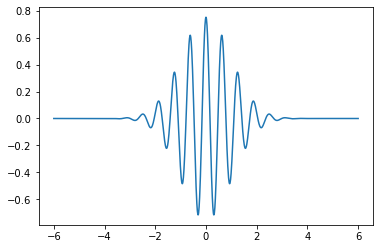

In [29]:
Psi=p(1,0,x)
plt.plot(x,Psi)

In [40]:
def psiT(t):
    sum=0
    for i in range(0,2*n+1):
        sum+=e**(-1.0j*t*eigval[i])*eigvec[:,i]*c(i)
    return sum 

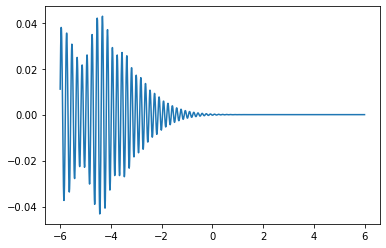

In [44]:
psiT(0.5)
plt.plot(x,psiT(0.05))
#plt.plot(x,.01*V(x))

In [17]:
ci=[]
for i in range(0,2*n+1):
    ci.append(c(i))

In [49]:
b=np.array([abs(ci)**2 for ci in ci])
np.sum(b)

0.3996174264675271

##  shooting

In [151]:
def V(x):
    return x**2
def func(x,E):
    return V(x)-E
def y(x,E):
    return 1-((h**2)*func(x,E))/12
def numerov(x0,xf,E,h):
    n=int((xf-x0)/h)
    psi=np.zeros(n)
    psi[0]=0
    psi[-1]=0
    psi[1]=psi[0]+h**5
    x=np.arange(x0,xf,h)
    for i in range(1,n-1):
        psi[i+1]=(psi[i]*(12-10*y(x[i],E))-psi[i-1]*y(x[i-1],E))/(y(x[i+1],E))
    return psi
def bisection(a,b,f,e):
    if f(a)*f(b)>0:
        print("wrong interval")
    while abs(b-a)>e:
        c=(a+b)/2
        if f(a)*f(c)<0:
            b=c
        elif f(b)*f(c)<0:
            a=c
    return c
def z(e):
    return numerov(x0,xf,e,h)[-1]

In [166]:
x0=-5
xf=5
h=.01
e1=4
e2=6
psi1=numerov(x0,xf,e1,h)
psi2=numerov(x0,xf,e2,h)

In [167]:
x=np.arange(x0,xf,h)

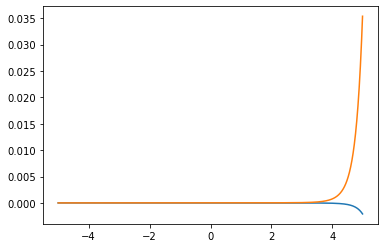

In [168]:
plt.plot(x,psi2)
plt.plot(x,psi1)

In [169]:
e3=bisection(e1,e2,z,.00001)

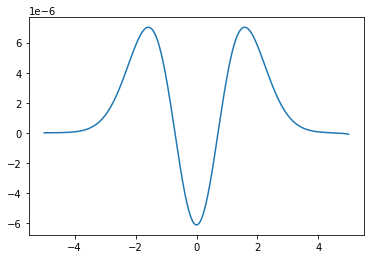

In [170]:
psi3=numerov(x0,xf,e3,h)
plt.plot(x,psi3)

In [35]:
a=10*1.6*10**(-19)
b=2*10**(-10)
h=6.626*10**(-34)  ## Planck constant
h_cut=h/(2*np.pi)
m=9.1*10**(-31)   ## Mass of electron (in kg)
E0=(h_cut**2)/(2*m*b**2)  ## Natural enrgy scale
alpha =  a/E0


def V(y):
    return alpha*(y**2-1)**2

In [25]:
dx=.01
L=6
n=int(L/dx)
x=np.linspace(-L,L,2*n+1)
def kron(i,j):
    return 1 if i==j else 0
def V(x):
    return -2/x
def h(i,j):
    return ((-kron(i+1,j)-kron(i-1,j)+2*kron(i,j))/dx**2)+V(dx*i)*kron(i,j)
H=np.array([[h(i,j) for i in range(1,2*n+2)] for j in range(1,2*n+2)])
pot=np.array([V(dx*i) for i in range(1,2*n+2)])
eigval,eigvec=lin.eig(H)
index=eigval.argsort()
eigval=eigval[index]
eigvec=eigvec[:,index]

In [ ]:
dx=.01
L=6
n=int(L/dx)
x=np.linspace(-L,L,dx)
def kron(i,j):
    return 1 if i==j else 0
def h(i,j):
    return (-kron(i-1,j)-kron(i+1,j)+2*kron(i,j))/dx**2 + V(dx*i)*kron(i,j)
H=np.array([[h(i,j) for i in range(-n,n+1)] for j in range(-n,n+1)])
pot=np.array([V(dx*i) for i in range(-n,n+1)])
eigvec,eigval=lin.eig(H)
index=eigval.argsort()
eigval=e

-0.9999749629924748
-0.24291932033571212


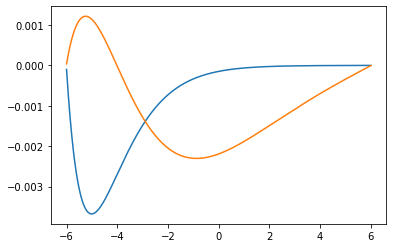

In [58]:
for i in range(2):
    psi=(20*eigvec[:,i])
    psi=psi/np.dot(psi.conj().T, psi)
    plt.plot(x,psi)
    print(eigval[i])
    #plt.plot(x,.001*pot)

In [60]:
psi=eigvec[:,0]
psi.conj().T
A=np.dot(psi.conj().T, psi)
A

1.0000000000000002

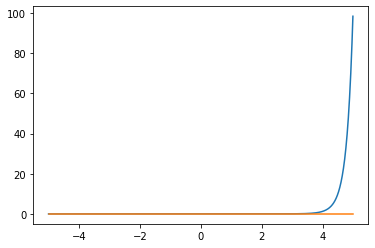

1.0000019073486328


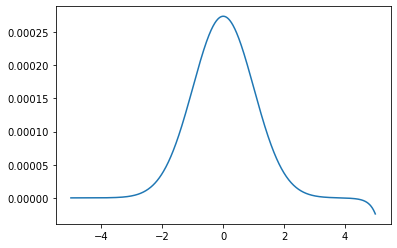

In [33]:
def func(x,E):
    return V(x)-E
def y(x,E):
    return 1-((h**2)*(func(x,E)))/12
def numerov(x0,xf,E,h):
    n=int((xf-x0)/h)
    psi=np.zeros(n)
    psi[0]=0
    psi[-1]=0
    psi[1]=psi[0]+h**5
    for i in range(1,n-1):
        psi[i+1]=(psi[i]*(12-10*y(x[i],E))-psi[i-1]*y(x[i-1],E))/y(x[i+1],E)
    return psi
def bisection(a,b,f,tol):
    if f(a)*f(b)>0:
        print("wrong interval")
    while abs(b-a)>tol:
        c=(a+b)/2
        if f(a)*f(c)<0:
            b=c
        elif f(b)*f(c)<0:
            a=c
    return c
def z(E):
    return numerov(x0,xf,E,h)[-1]
x0=-5
xf=5
h=.01
x=np.arange(x0,xf,h)
e1=0
e2=3
psi1=numerov(x0,xf,e1,h)
psi2=numerov(x0,xf,e2,h)
plt.plot(x,psi1)
plt.plot(x,psi2)
plt.show()
e3=bisection(e1,e2,z,.00001)
psi3=numerov(x0,xf,e3,h)
plt.plot(x,psi3)
print(e3)

In [8]:
def V(x):
    return x**2
def func(x,E):
    return V(x)-E
def y(x,E):
    return (1-(h**2)*func(x,E)/12)
def numerov(x0,xf,e,h):
    n=int((xf-x0)/h)
    psi=np.zeros(n)
    psi[0]=0
    psi[-1]=0
    psi[1]=psi[0]+h**5
    for i in range(1,n-1):
        psi[i+1]=(psi[i]*(12-10*y(x[i-1],e))-psi[i-1]*y(x[i-1],e))/y(x[i+1],e)
    return psi
def bisection(a,b,f,tol):
    if f(a)*f(b)>0:
        print("wring")
    while abs(b-a)>tol:
        c=(a+b)/2
        if f(a)*f(c)<0:
            b=c
        elif f(b)*f(c)<0:
            a=c
    return c
def z(e):
    return numerov(x0,xf,e,h)[-1]

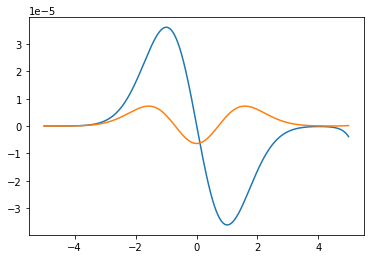

3.000014305114746


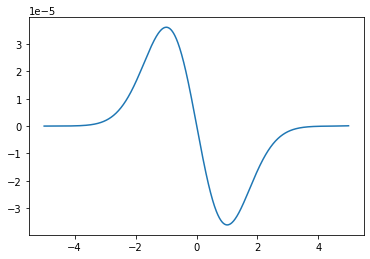

In [16]:
x0=-5
xf=5
h=.01
e1=3
e2=5
x=np.arange(x0,xf,h)
psi1=numerov(x0,xf,e1,h)
psi2=numerov(x0,xf,e2,h)
plt.plot(x,psi1)
plt.plot(x,psi2)
plt.show()
e3=bisection(e1,e2,z,.000001)
psi3=numerov(x0,xf,e3,h)
plt.plot(x,psi3)
print(e3)

In [7]:
dx=.01
L=3
n=int(L/dx)
x=np.linspace(-L,L,2*n+1)

In [8]:
def V(x):
    return x**2
def kron(i,j):
    return 1 if i==j else 0
def h(i,j):
    return ((-kron(i-1,j)-kron(i+1,j)+2*kron(i,j))/dx**2)+V(dx*i)*kron(i,j)

In [10]:
H=np.array([[h(i,j) for i in range(-n,n+1)] for j in range(-n,n+1)])
pot=np.array([V(dx*i) for i in range(-n,n+1)])

In [11]:
eigval,eigvec=lin.eig(H)
index=eigval.argsort()
eigval=eigval[index]
eigvec=eigvec[:,index]

0.9999999999999999

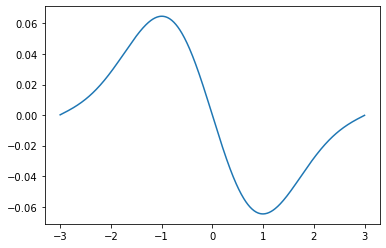

In [17]:
psi0=eigvec[:,1]
plt.plot(x,psi0)
A=np.dot(psi0.conj().T,psi0)
A